In [160]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os

df2 = pd.DataFrame({'period': [], 'pos': [], 'neg': [], 'neu': []})
path = './filter_scrap_data/valid_data/'
file_list = os.listdir(path)

df = pd.read_csv("./filter_scrap_data/valid_data/concat_csv.ipynb/total.csv")
for i in df.iloc:
    now = dt.datetime.now()
    min_diff = (now - dt.datetime.fromtimestamp(i.created_utc)).total_seconds() / 60 / 60 / 24
    if (df2['period']==int(min_diff)).any():
        if i.title_vader>0.5:
            df2.loc[(df2['period']==int(min_diff)), 'pos'] += 1
        elif i.title_vader<-0.5:
            df2.loc[(df2['period']==int(min_diff)), 'neg'] += 1
        else:
            df2.loc[(df2['period']==int(min_diff)), 'neu'] += 1
    else:
        df2 = df2.append({'period': int(min_diff), 'pos': 0, 'neg': 0, 'neu': 0}, ignore_index=True)

df2 = df2.sort_values(by='period', ascending=True)
df2 = df2.set_index('period')
print(df2.head(100))


         pos   neg    neu
period                   
33.0    49.0  16.0  166.0
34.0    39.0  11.0  202.0
35.0    42.0  14.0  241.0
36.0    52.0  13.0  193.0
37.0    42.0  15.0  185.0
...      ...   ...    ...
128.0   41.0  10.0  178.0
129.0   41.0  15.0  222.0
130.0   52.0  11.0  218.0
131.0   54.0  19.0  232.0
132.0   63.0  13.0  218.0

[100 rows x 3 columns]


 일단 편의를 위해 20년 11월 data 사용함.
 1일 단위로 나누어서 pos, neg, neu, sum 컬럼의 df로 만듦.

In [220]:
df2['axis'].to_csv('recommand.csv', sep=',')

In [161]:
df2['axis'] = df2['pos']/(df2['pos'] + df2['neg'])*100

print(df2['axis'].min())
print(df2['axis'].mean())
print(df2['axis'].max())

df2['axis'] -= 20
print(df2['axis'].min())
print(df2['axis'].mean())
print(df2['axis'].max())
print(df2['axis'])


28.57142857142857
70.69112708925073
100.0
8.57142857142857
50.69112708925068
80.0
period
33.0     55.384615
34.0     58.000000
35.0     55.000000
36.0     60.000000
37.0     53.684211
           ...    
702.0    57.272727
703.0    49.230769
704.0    50.370370
705.0    53.684211
706.0    60.000000
Name: axis, Length: 655, dtype: float64


 일단은 pos/(pos+neg)로.
 평균값이 71.13...이기에 일단 20을 빼서 결과출력.

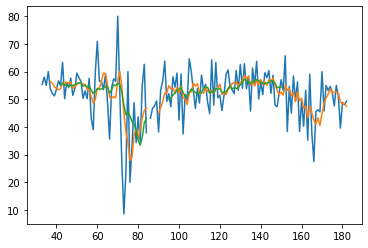

In [176]:
mov5 = df2['axis'].rolling(5).mean()
mov10 = df2['axis'].rolling(10).mean()
plt.plot(df2.iloc[0:150]['axis'])
plt.plot(mov5.iloc[0:150])
plt.plot(mov10[0:150])

10일, 20일 이평

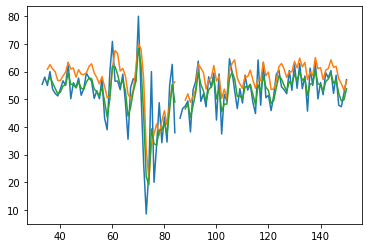

In [215]:
def weightedMean(weightArray):
    def inner(x):
        return (weightArray * x).mean()
    return inner

n = 3
t = [v for v in np.arange(1, n+1)]
sumv = sum(t) / n
wts = np.array(t) / sumv
wMov20 = df2['axis'].rolling(n).apply(weightedMean(wts), raw=True)
plt.plot(df2['axis'][0:150])
plt.plot(mov5[0:150])
plt.plot(wMov20[0:150])

가중이평

0.0
0.589675779249509
1.0


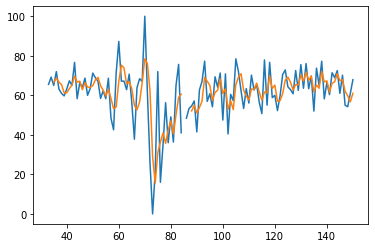

In [219]:
data = df2['axis']
data_std = (data - data.min()) / ( data.max() - data.min())
print(data_std.min())
print(data_std.mean())
print(data_std.max())


data2 = data_std*100
plt.plot(data2[0:150])

mov5 = data2.rolling(3).mean()
plt.plot(mov5[0:150])